In [1]:
from IPython.display import display

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
from datetime import datetime,timedelta
from pandas.plotting import register_matplotlib_converters
from mpl_toolkits.mplot3d import Axes3D

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time
import seaborn as sns
sns.set(style="whitegrid")

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope

import warnings
warnings.filterwarnings('ignore')

RANDOM_SEED = np.random.seed(0)


In [4]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')
#read data
catfish_sales = pd.read_csv('catfish.csv', parse_dates=[0], index_col=0, date_parser=parser)
# infer the frequency of the data, analyze the time differences between consecutive dates and try to determine the most appropriate frequency (e.g. monthly, daily, hourly)
# 'asfreq' is to resample the time series to the infeered frequency, if inferred = disired freq, do nothing; else, fill missing values to match the desired frequency
catfish_sales = catfish_sales.asfreq(pd.infer_freq(catfish_sales.index))
catfish_sales.loc["1998-12-1"]['Total'] = 10000

start_date = datetime(1996,1,1)
end_date = datetime(2000,1,1)
lim_catfish_sales = catfish_sales[start_date:end_date]

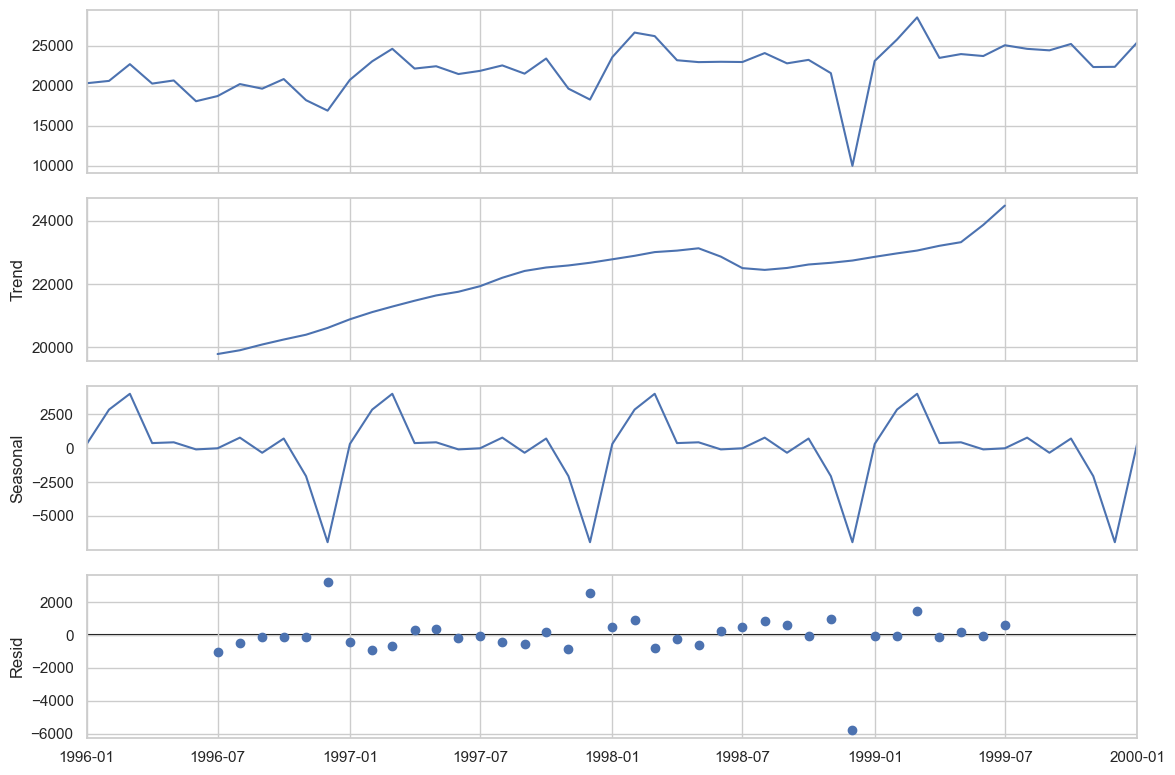

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates
plt.rc('figure',figsize=(12,8))
plt.rc('font',size=15)

result = seasonal_decompose(lim_catfish_sales,model='additive')
fig = result.plot()

analyze the deviation of residue (__result.resid.values__) and introduce some threshold 

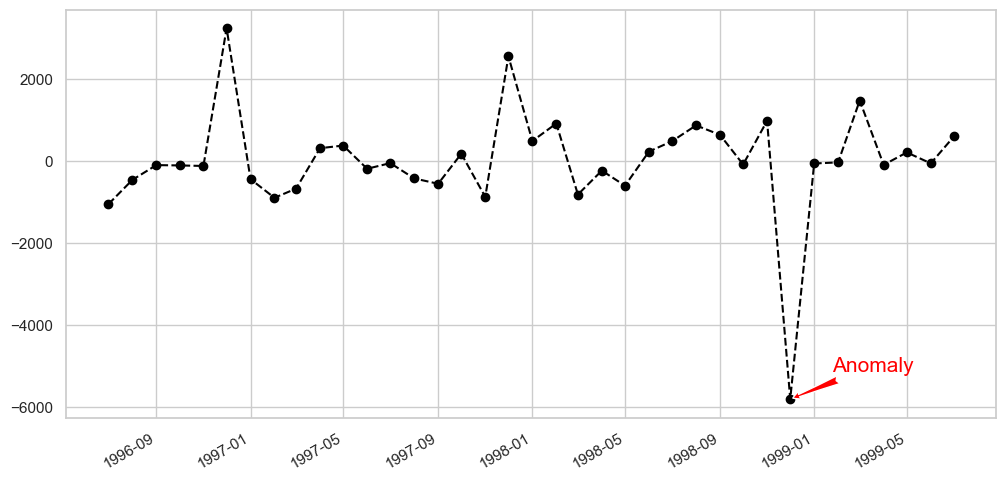

In [7]:
plt.rc('figure',figsize=(12,6))
plt.rc('font',size=15)
fig, ax = plt.subplots()
x = result.resid.index
y = result.resid.values
ax.plot_date(x, y, color='black',linestyle='--')
ax.annotate('Anomaly', (mdates.date2num(x[35]), y[35]), xytext=(30, 20),
          textcoords='offset points', color='red',arrowprops=dict(facecolor='red',arrowstyle='fancy'))
fig.autofmt_xdate()
plt.show()